In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [3]:
filename = '../csv_detection_info/18_3, MCD.csv'
filename_clean = '../csv_detection_info_clean/18_3, MCD.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/18/3, MCD'

In [4]:
detection_df = pd.read_csv(filename)

In [5]:
detection_df

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
0,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.82.1.1.1430.1216030460.10.0.0.10.578...,848,1039,1164,1357,0.797153,18,3,"3, MCD"
1,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.17743.20180710.121408.0.dcm,361,457,672,769,0.996734,18,3,"3, MCD"
2,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.17743.20181015.131421.0.dcm,381,542,595,756,0.973306,18,3,"3, MCD"
3,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.18290.20180925.120150.0.dcm,360,508,691,838,0.868939,18,3,"3, MCD"
4,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.20181107.85055.0.0.dcm,572,716,469,613,0.999979,18,3,"3, MCD"
...,...,...,...,...,...,...,...,...,...,...
68,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.4093445548.52726.52032.46428.36307....,323,479,670,826,1.000000,18,3,"3, MCD"
69,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.44262184.26172.30029.43899.6082.429...,479,665,1310,1496,0.775305,18,3,"3, MCD"
70,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.689897937.26328.20301.39049.34696.5...,722,880,1083,1240,1.000000,18,3,"3, MCD"
71,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.858671874.61223.20801.41687.28891.5...,1117,1272,1524,1680,0.999995,18,3,"3, MCD"


### [Optional] Sort by confidence (filter out bad prediction)

In [6]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [7]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([25, 26, 32], dtype='int64')

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [8]:
# plot every 9 of them

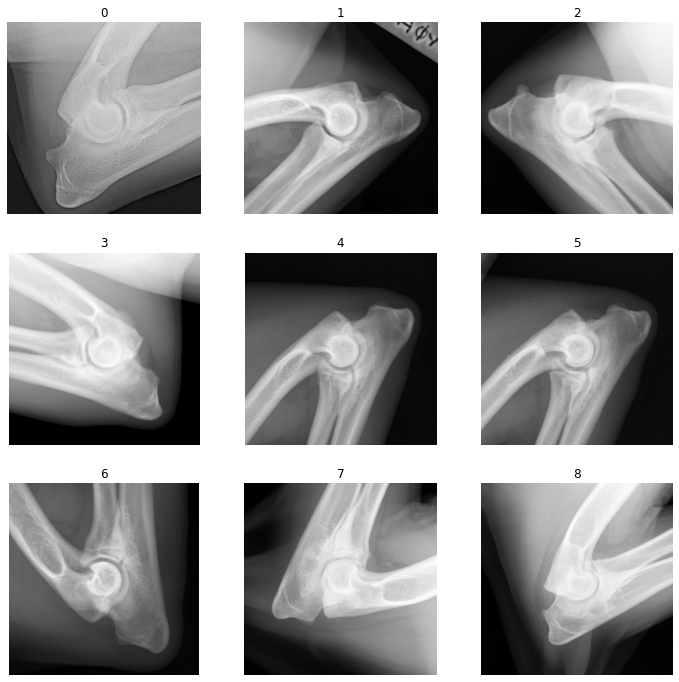

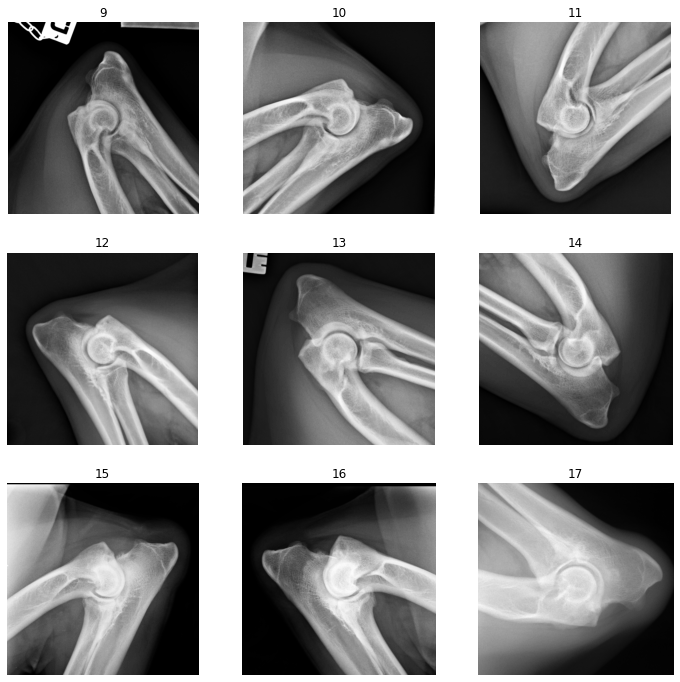

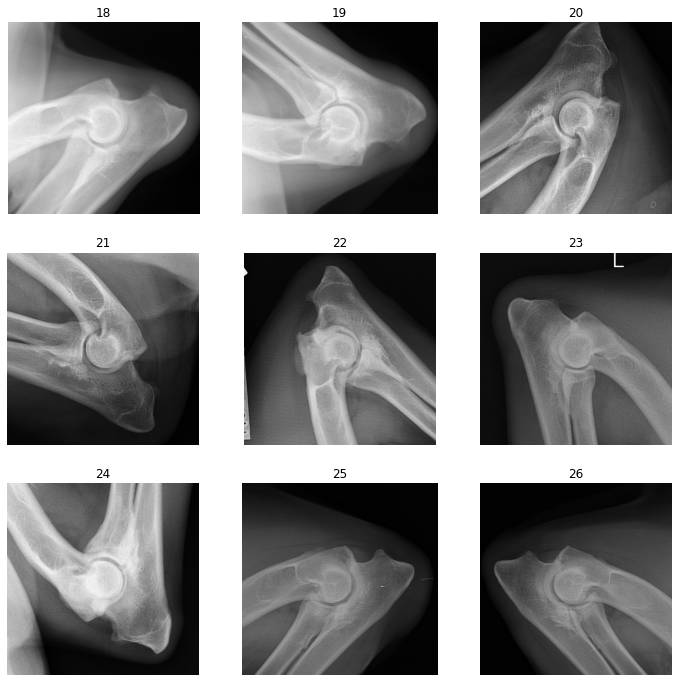

C:\NMBU\TEMP\ipykernel_19388\89006417.py:5: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')
C:\NMBU\TEMP\ipykernel_19388\89006417.py:5: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')


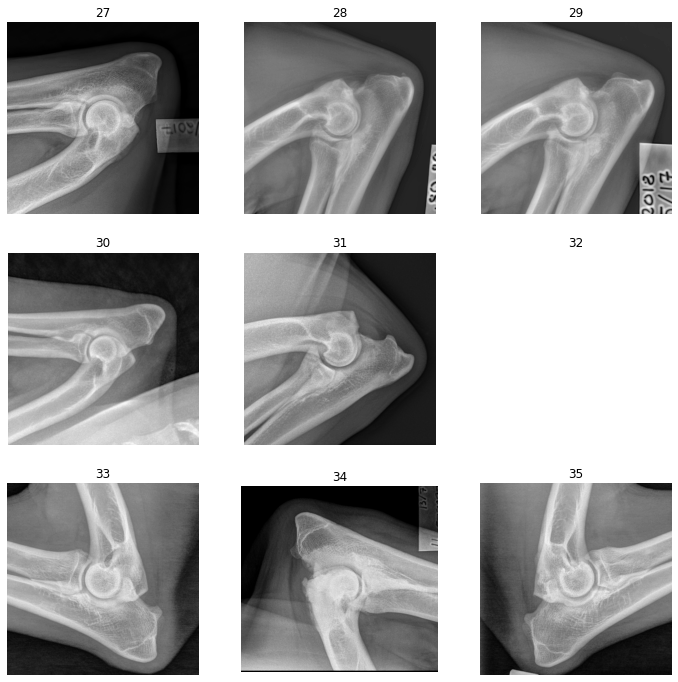

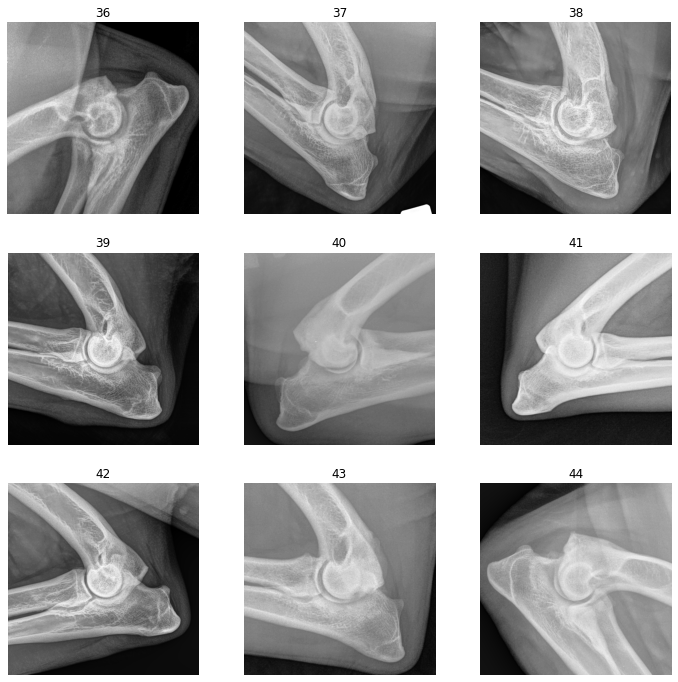

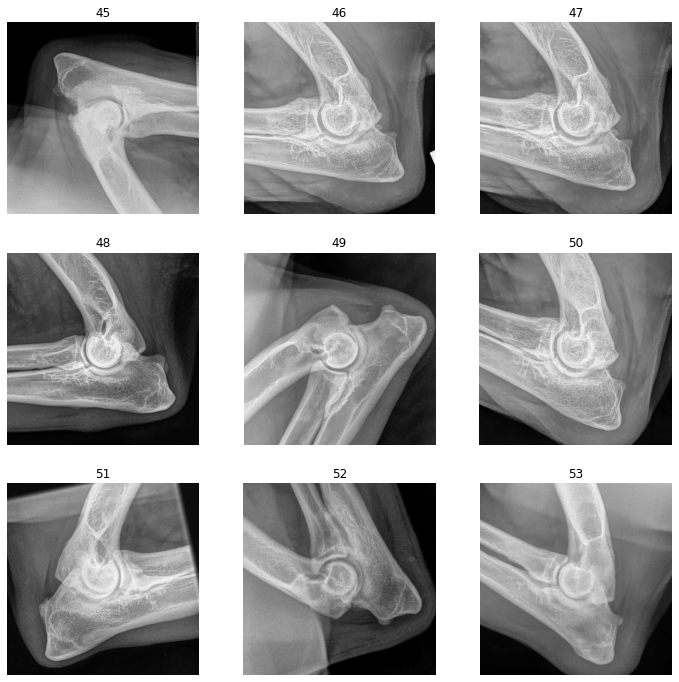

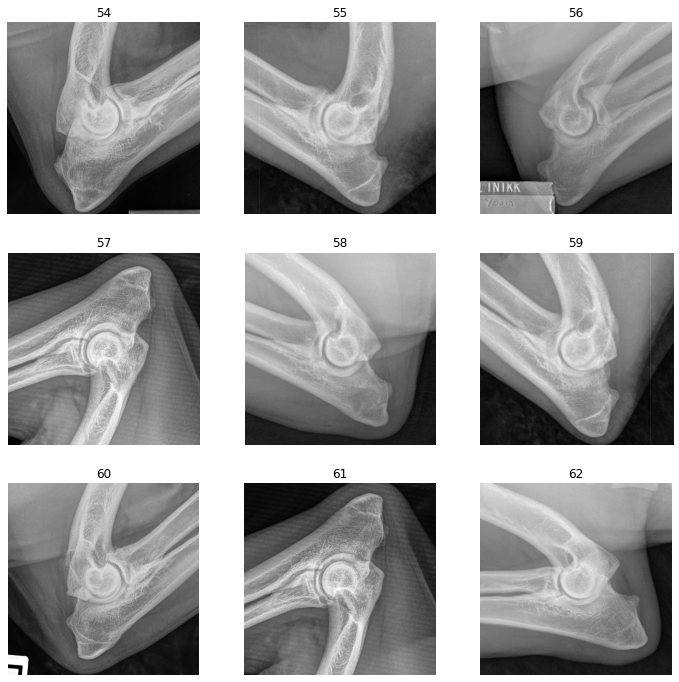

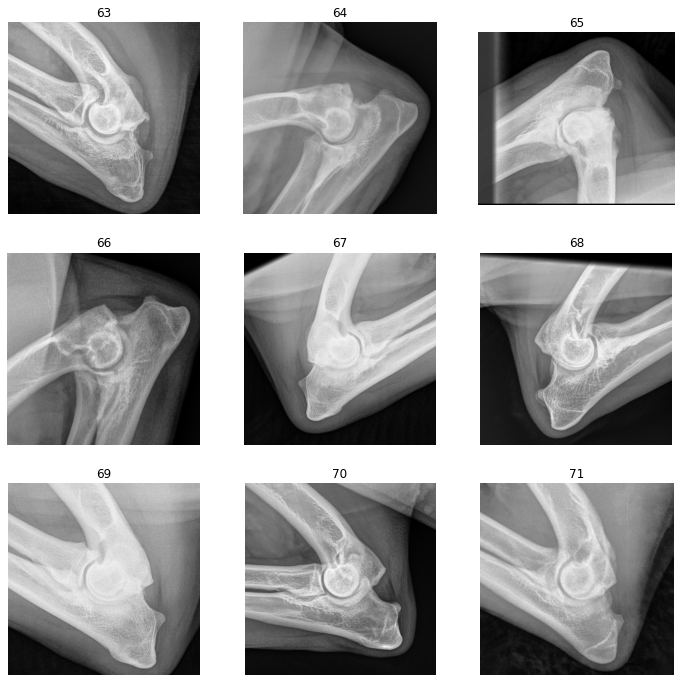

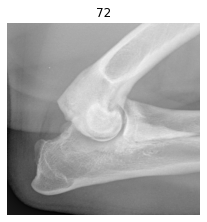

In [9]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [10]:
remove_indice = [32]
detection_df[~detection_df.index.isin(remove_indice)]

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
0,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.82.1.1.1430.1216030460.10.0.0.10.578...,848,1039,1164,1357,0.797153,18,3,"3, MCD"
1,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.17743.20180710.121408.0.dcm,361,457,672,769,0.996734,18,3,"3, MCD"
2,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.17743.20181015.131421.0.dcm,381,542,595,756,0.973306,18,3,"3, MCD"
3,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.18290.20180925.120150.0.dcm,360,508,691,838,0.868939,18,3,"3, MCD"
4,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.20181107.85055.0.0.dcm,572,716,469,613,0.999979,18,3,"3, MCD"
...,...,...,...,...,...,...,...,...,...,...
68,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.4093445548.52726.52032.46428.36307....,323,479,670,826,1.000000,18,3,"3, MCD"
69,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.44262184.26172.30029.43899.6082.429...,479,665,1310,1496,0.775305,18,3,"3, MCD"
70,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.689897937.26328.20301.39049.34696.5...,722,880,1083,1240,1.000000,18,3,"3, MCD"
71,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.858671874.61223.20801.41687.28891.5...,1117,1272,1524,1680,0.999995,18,3,"3, MCD"


In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
new_detection_df.to_csv(filename_clean, index=False)